<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/courses/ds4b-m1-1-intro/notebooks/s1-manipilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Introduction

In this session, you will learn the basic grammar of data manipulation, some best-practice advices. Since data manipulation always follows a purpose and requires some understanding of the data at hand, we will also have a first glance data exploration and visualization. However, we will her only cover the very basics and skip most of the details. Again, you will have a dedicated sessions lateron.

In this session, you will learn:

* How to do basic variable filtering, selection, and manipulation
* How to create various types of data summarization
* How to also apply these actions on grouped data
* How to join data from different sources
* How to reshape (pivot) your data

From my experience, this covers ca. 80% of common data manipulation tasks. These operations are related to 5 central verbs of data/manipulation within the "Structured Query Language" (SQL). While Python/Pandas has for many no direct implementatiions, it is still helpful to think about and describe data operation workflows with them. They are:

1. `filter()` picks cases based on their values.
2. `select()` picks variables based on their names.
3. `arrange()` changes the ordering of the rows.
4. `mutate()` adds new variables that are functions of existing variables
5. `summarise()` reduces multiple values down to a single summary.

These all combine naturally with `group_by()` which allows you to perform any operation "by group". 

Sound like fun? Lets get started!

**Note:** Since it is the object we will mostly work with in typical data science projects, this session will focus on working with the pandas dataframe. Will some of the operations will work also on other data objects, many will not or in a different way.

Pandas is a very comprehensive library for data manipulation and analysis

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


## The dataset
We will explore now a bit with the starwars dataset. We uploaded it to our github as a csv, se we can directly load it usin g its url and pandas `read_csv()`
First, let's get an intuition what's in it. `head()` shows us the first 10 rows.

In [ ]:
starwars = pd.read_csv("https://sds-aau.github.io/SDS-master/M1/data/characters_starwars.csv")

In [ ]:
starwars.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [ ]:
starwars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  81 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      84 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(2), object(8)
memory usage: 6.9+ KB


# Vocabulary of data manipulation

## Filter

`Filter()` means to subset a dataframe by rows (observations), meaning the output will filter for only rows which fulfill a certain condition.

In [ ]:
# via index
starwars[starwars['species'] == 'Droid']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15BBY,none,NaN,Droid
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid


In [ ]:
# or "Query style" (There are always many ways of doing the same thing)
starwars.query('species == "Droid" & homeworld == "Tatooine"')

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid


## Select

`select()` means to subset a dataframe by column (variable), meaning the output will only contain certain columns in the stated order

In [ ]:
# positive selection
df_select = starwars[['name','homeworld']]
df_select.head()

,name,homeworld
0,Luke Skywalker,Tatooine
1,C-3PO,Tatooine
2,R2-D2,Naboo
3,Darth Vader,Tatooine
4,Leia Organa,Alderaan


In [ ]:
# Negative selection (drop)
df_select = starwars.drop(['birth_year','skin_color'], axis=1)
df_select.head()

,name,height,mass,hair_color,eye_color,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human


In [ ]:
# Conditional selection
col_columns = [x for x in starwars.columns if x.endswith('color')]
df_select = starwars[['name'] + col_columns]
df_select.head()

,name,hair_color,skin_color,eye_color
0,Luke Skywalker,blond,fair,blue
1,C-3PO,NaN,gold,yellow
2,R2-D2,NaN,"white, blue",red
3,Darth Vader,none,white,yellow
4,Leia Organa,brown,light,brown


# Arrange
`arrange()` defines the way the rows of your dataframe are ordered

In [ ]:
# arrange in python is sort_values homeworld-ascending, mass-descending
df_arrange = starwars.sort_values(by=['homeworld', 'mass'], ascending=[True, False])
df_arrange.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
78,Raymus Antilles,188.0,79.0,brown,light,brown,NaN,male,Alderaan,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human
64,Bail Prestor Organa,191.0,NaN,black,tan,brown,67BBY,male,Alderaan,Human
71,Ratts Tyerell,79.0,15.0,none,"grey, blue",NaN,NaN,male,Aleen Minor,Aleena
24,Lobot,175.0,79.0,none,light,blue,37BBY,male,Bespin,Human


## Mutate

`mutate()` means to manipulate existing variables or create new ones. Here, depending on the type of manipulation, Python/Pandas has many alternatives. 

Lets start with the simplest: Lets say we want to calculate the starwars characters body mass index (BMI), which is $BMI = {weight}/{height}^2$




In [ ]:
# easy!
starwars['bmi'] = starwars['mass'] / (starwars['height'] /100)**2 

In [ ]:
# Complicated but good for more complex stuff
# We can also use apply (rowwise itration) with so-called lambda functions (anonymous fuctions). They have a strange syntax but are very practical for a variety of tasks.

starwars['bmi'] = starwars.apply(lambda x: x['mass']/(x['height'] / 100)**2, axis=1) #x is here one row of the DF 

# Summarize
`summarize()` operations reduces your dataset to one observation, which is summarized according to a defined function.

In [ ]:
print(starwars['height'].min())
print(starwars['height'].mean())
print(starwars['height'].max())
print(starwars['height'].std())

66.0
174.35802469135803
264.0
34.77042875849222


## (+1) group_by
Finally, `by_group()` is offers the perfect complement to the 5 basic verbs, since it allows to perform aqll the above mentioned tasks sepperate according to used-defined groupings in one or multiple categories. Lets look at some examples:

First of all, it works amazingly well with the `summarize()` verb, producing within group summaries[link text](https://)

In [ ]:
starwars.groupby(by='homeworld')['height'].mean().sort_values(ascending=False).head(10)

## (+2) Two-Table Verbs

It's rare that a data analysis involves only a single table of data. In practice, you'll normally have many tables that contribute to an analysis, and you need flexible tools to combine them. There are three families of verbs that work with two tables at a time:

1. Mutating joins, which add new variables to one table from matching rows in another.
2. Filtering joins, which filter observations from one table based on whether or not they match an observation in the other table.
3. Set operations, which combine the observations in the data sets as if they were set elements.

Among those, mutating joins are the by far most used ones, so we will briefly discuss them here, and cover other types later in the applied part. Mutating joins allow you to combine variables from multiple tables (merging data).

I could go through it on my own, but instead will refer to the excellent introduction in [Python for Data Science Handbook (VanderPlas, 2016), Chapter 3.08](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

# Case Study: Cleaning up historical data on voting of the United Nations General Assembly

So, after we refreshed the basic grammar of data-manipulation, we will put it to a test in the following example. We will step-by-step explore the power of the basic grammar of data-manipulation.

We will use the "UN General Assembly Voting" dataset, and explore the pattern and some underlying mechanisms of country voting choices. Lets get started!


Source: Erik Voeten "Data and Analyses of Voting in the UN General Assembly" Routledge Handbook of International Organization, edited by Bob Reinalda (published May 27, 2013). Available at SSRN: http://ssrn.com/abstract=2111149


## Step 1: Optaining the deta
Usually, we would now have to download some data online, access it via an API or a local database, or something like that. The full dataset is available at [Harvard's DataVerse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379).  For a first warm up, we will skip this part, and use the following data I conveniently prepared for you.

In [ ]:
# data is saved as parquet, a nice and lightweight format to save dataframes
votes = pd.read_parquet("https://sds-aau.github.io/SDS-master/M1/data/votes.pq")


## Step 2: First Inspection

Lets first have a look what's in the dataset

In [ ]:
votes.head()

,rcid,session,vote,ccode,year
3,46,2,9,31,1947
7,46,2,9,51,1947
8,46,2,9,52,1947
9,46,2,9,53,1947
10,46,2,9,54,1947


In [ ]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180676 entries, 3 to 508929
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   rcid     180676 non-null  int64
 1   session  180676 non-null  int64
 2   vote     180676 non-null  int64
 3   ccode    180676 non-null  int64
 4   year     180676 non-null  int64
dtypes: int64(5)
memory usage: 8.3 MB


We see that the dataset is with 508,929 observations already somewhat large. We find a set of 4 variables. Doesn't sound so exiting on first glance. Anyhow, lets talk for a moment about the variables we have:

* **`rcid:`** The roll-call ID, serving as an unique identifyer for the resolution vouted on.
* **`session:`** The number of the session of the annual UNGA, starting with 1 for the historically first meeting
* **`vote:`** A numerical code representing the country's choice of vote:
     * 1 = Yes
     * 2 = Abstain
     * 3 = No
     * 8 = Not present
     * 9 = Not a member
* **`ccode:`** A numerical code to identify the country

So, to sum up: 

* Every row contains a voting choice for a particular resolution on country level. 
* Consequently, we will for every resulution have a single row for every country.
* All variables are coded numerically

## Step 3: Preprocessing

Whatever data you obtian, it usually needs a bit of manual "massage" to be ready for further analysis. Common steps here are

1. Check variable format (dates, strings, numeric etc.)
2. Check variable scaling (range, outliers)
3. Deal with missing values

While there are some more issues you could run into, we in the following go through a couple of common problems and see some easy ways how to solve them.

### Filtering
One step of data cleaning is removing observations (rows) that you're not interested in. In this case, you want to remove "Not present" and "Not a member". Since we are for now not interested in them, lets get rid of them

In [ ]:
votes = votes[votes['vote'] <= 3]

### Adding a year column
The next step of data cleaning is manipulating your variables (columns) to make them more informative. In this case, you have a session column that is hard to interpret intuitively. But since the UN started voting in 1946, and holds one session per year, you can get the year of a UN resolution by adding 1945 to the session number.

In [ ]:
votes['year'] = votes['session'] + 1945

### Adding a country column
The country codes in the ccode column are what's called [Correlates of War codes](http://cow.dss.ucdavis.edu/data-sets/cow-country-codes), a numerical coding convention for country names. This isn't ideal for an analysis, since you'd like to work with recognizable country names.

For this and similar cases, the package `countrycode` is really practical, since it allows for fast and easy ways to switch between many standard country-coding conventions. Since it is not by default installed on colab, we need to dom so first.

In [ ]:
!pip install countrycode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from countrycode import countrycode
# let's measure how long it takes
%time countries = countrycode.countrycode(votes.ccode[:100], origin='cown', target='country_name')

CPU times: user 25.1 ms, sys: 0 ns, total: 25.1 ms
Wall time: 27.5 ms


The package is a bit slow and thus perhaps it is easier to speed up things by transforming only the unique country-codes and then just merge them back (this is a bit of a deviation from the R notebook)

In [ ]:
unique_countrycodes = votes.ccode.unique()
uniques_countries = countrycode.countrycode(unique_countrycodes, origin='cown', target='country_name')

In [ ]:
lookup_df = pd.DataFrame({'ccode' : unique_countrycodes,
                          'country_name': uniques_countries})

lookup_df.head()

,ccode,country_name
0,2,UNITED STATES
1,20,CANADA
2,40,CUBA
3,41,HAITI
4,42,DOMINICAN REPUBLIC


In [ ]:
#adding the countries to the initial data
votes = votes.merge(lookup_df, how='left')

In [ ]:
votes.reset_index(drop=True,inplace=True)

In [ ]:
votes.head()

,rcid,session,vote,ccode,year,country_name
0,46,2,1,2,1947,UNITED STATES
1,46,2,1,20,1947,CANADA
2,46,2,1,40,1947,CUBA
3,46,2,1,41,1947,HAITI
4,46,2,1,42,1947,DOMINICAN REPUBLIC


In [ ]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353547 entries, 0 to 353546
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rcid          353547 non-null  int64 
 1   session       353547 non-null  int64 
 2   vote          353547 non-null  int64 
 3   ccode         353547 non-null  int64 
 4   year          353547 non-null  int64 
 5   country_name  348960 non-null  object
dtypes: int64(5), object(1)
memory usage: 16.2+ MB


## 4.4 Generating first insights
In this analysis, we're going to focus on "% of votes that are yes" as a metric for the "agreeableness" of countries. we'll start by finding this summary for the entire dataset: the fraction of all votes in their history that were "yes". Note that within your call to `summarize()`, you can use `n()` to find the total number of votes and `mean(vote == 1)` (since the output of the logical operation is FALSE or TRUE, which is equivalent to 0 or 1) to find the fraction of "yes" votes.

In [ ]:
len(votes[votes.vote == 1]) / len(votes)

0.7999247624785389

In [ ]:
# Using nice built in stuff
votes.vote.value_counts(normalize=True)

1    0.799925
2    0.128532
3    0.071544
Name: vote, dtype: float64

In [ ]:
votes.groupby('year')['vote'].value_counts(normalize=True)

year  vote
1947  1       0.569397
      3       0.293771
      2       0.136832
1949  1       0.437590
      3       0.325742
                ...   
2011  2       0.109404
      3       0.079542
2013  1       0.807042
      2       0.114994
      3       0.077964
Name: vote, Length: 102, dtype: float64

The rest of this section has ben covered in many assignments and the python EDA lecture

descriptions <- readRDS("data/UN_votes_descriptions.rds")

In [ ]:
!wget https://github.com/SDS-AAU/SDS-master/blob/master/00_data/UN_votes_descriptions.rds?raw=true

--2022-08-30 15:28:10--  https://github.com/SDS-AAU/SDS-master/blob/master/00_data/UN_votes_descriptions.rds?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SDS-AAU/SDS-master/raw/master/00_data/UN_votes_descriptions.rds [following]
--2022-08-30 15:28:10--  https://github.com/SDS-AAU/SDS-master/raw/master/00_data/UN_votes_descriptions.rds
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/UN_votes_descriptions.rds [following]
--2022-08-30 15:28:10--  https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/UN_votes_descriptions.rds
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [ ]:
!pip install pyreadr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyreadr

In [ ]:
result = pyreadr.read_r('UN_votes_descriptions.rds?raw=true.1')
result

OrderedDict([(None,
                      rcid  session       date      unres   me   nu   di   hr   co   ec
              0       46.0      2.0 1947-09-04    R/2/299  0.0  0.0  0.0  0.0  0.0  0.0
              1       47.0      2.0 1947-10-05    R/2/355  0.0  0.0  0.0  1.0  0.0  0.0
              2       48.0      2.0 1947-10-06    R/2/461  0.0  0.0  0.0  0.0  0.0  0.0
              3       49.0      2.0 1947-10-06    R/2/463  0.0  0.0  0.0  0.0  0.0  0.0
              4       50.0      2.0 1947-10-06    R/2/465  0.0  0.0  0.0  0.0  0.0  0.0
              ...      ...      ...        ...        ...  ...  ...  ...  ...  ...  ...
              2584  9052.0     22.0 1967-07-02  ESS/5/101  1.0  0.0  0.0  0.0  0.0  0.0
              2585  9053.0     22.0 1967-07-02  ESS/5/102  1.0  0.0  0.0  0.0  0.0  0.0
              2586  9054.0     22.0 1967-07-05   ESS/5/41  1.0  0.0  0.0  0.0  0.0  0.0
              2587  9055.0     22.0 1967-07-05   ESS/5/97  0.0  0.0  0.0  0.0  0.0  0.0
            

In [ ]:
descriptions = result[None]

In [ ]:
descriptions['year'] = pd.to_datetime(descriptions.date).dt.year

In [ ]:
votes_joined = votes.merge(descriptions, how='inner')
votes_joined.drop(['ccode','date','session','unres'], axis=1, inplace=True)
votes_joined.head()

,rcid,vote,year,country_name,me,nu,di,hr,co,ec
0,46,1,1947,UNITED STATES,0.0,0.0,0.0,0.0,0.0,0.0
1,46,1,1947,CANADA,0.0,0.0,0.0,0.0,0.0,0.0
2,46,1,1947,CUBA,0.0,0.0,0.0,0.0,0.0,0.0
3,46,1,1947,HAITI,0.0,0.0,0.0,0.0,0.0,0.0
4,46,1,1947,DOMINICAN REPUBLIC,0.0,0.0,0.0,0.0,0.0,0.0


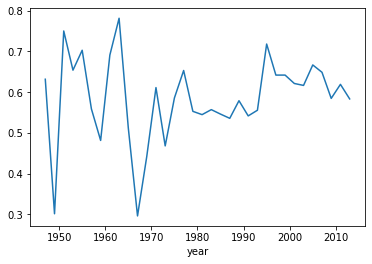

In [ ]:
us_col_perc = votes_joined[(votes_joined.country_name == 'DENMARK')].groupby('year')['vote'].value_counts(normalize=True)
us_col_perc.loc[:,1].plot()

In [ ]:
countries = ["United States", "China", "France", "Denmark"]

countries = [country.upper() for country in countries] # Upper casing
print(countries) # just display - no function


votes_joined[votes_joined['country_name'].isin(countries)].head()

['UNITED STATES', 'CHINA', 'FRANCE', 'DENMARK']


,rcid,vote,year,country_name,me,nu,di,hr,co,ec
0,46,1,1947,UNITED STATES,0.0,0.0,0.0,0.0,0.0,0.0
25,46,1,1947,FRANCE,0.0,0.0,0.0,0.0,0.0,0.0
35,46,1,1947,DENMARK,0.0,0.0,0.0,0.0,0.0,0.0
54,47,1,1947,UNITED STATES,0.0,0.0,0.0,1.0,0.0,0.0
79,47,1,1947,FRANCE,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Yes, python can do pretty plots, too

import seaborn as sns
sns.set(style="darkgrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
countries_perc_yes = votes_joined[votes_joined['country_name'].isin(countries) ].groupby(['year', 'country_name'])['vote'].value_counts(normalize=True)


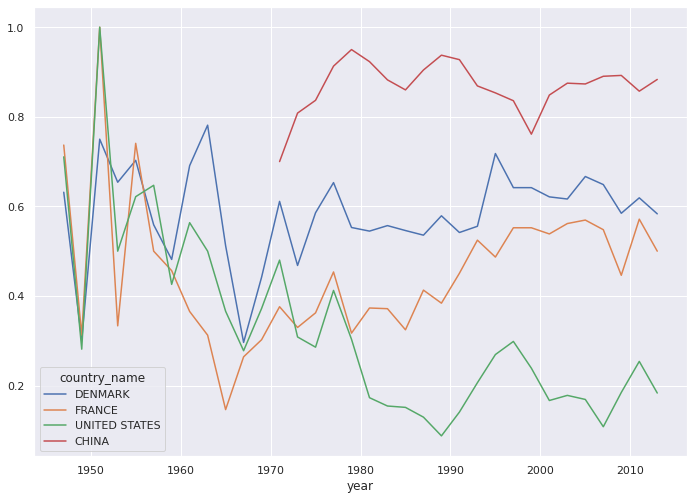

In [ ]:
to_plot = countries_perc_yes.loc[:,:,1]

sns.lineplot(x = to_plot.index.get_level_values(0), y = to_plot.values, hue = to_plot.index.get_level_values(1))